In [4]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

In [1]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

# 분석에 사용 할 데이터셋을 불러와 탐색합니다.

https://archive.ics.uci.edu/ml/datasets/Wine+Quality 를 사용했습니다.

In [2]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv
Saving sample_submission.csv to sample_submission.csv


{'sample_submission.csv': b'index,quality\r\n0,0\r\n1,0\r\n2,0\r\n3,0\r\n4,0\r\n5,0\r\n6,0\r\n7,0\r\n8,0\r\n9,0\r\n10,0\r\n11,0\r\n12,0\r\n13,0\r\n14,0\r\n15,0\r\n16,0\r\n17,0\r\n18,0\r\n19,0\r\n20,0\r\n21,0\r\n22,0\r\n23,0\r\n24,0\r\n25,0\r\n26,0\r\n27,0\r\n28,0\r\n29,0\r\n30,0\r\n31,0\r\n32,0\r\n33,0\r\n34,0\r\n35,0\r\n36,0\r\n37,0\r\n38,0\r\n39,0\r\n40,0\r\n41,0\r\n42,0\r\n43,0\r\n44,0\r\n45,0\r\n46,0\r\n47,0\r\n48,0\r\n49,0\r\n50,0\r\n51,0\r\n52,0\r\n53,0\r\n54,0\r\n55,0\r\n56,0\r\n57,0\r\n58,0\r\n59,0\r\n60,0\r\n61,0\r\n62,0\r\n63,0\r\n64,0\r\n65,0\r\n66,0\r\n67,0\r\n68,0\r\n69,0\r\n70,0\r\n71,0\r\n72,0\r\n73,0\r\n74,0\r\n75,0\r\n76,0\r\n77,0\r\n78,0\r\n79,0\r\n80,0\r\n81,0\r\n82,0\r\n83,0\r\n84,0\r\n85,0\r\n86,0\r\n87,0\r\n88,0\r\n89,0\r\n90,0\r\n91,0\r\n92,0\r\n93,0\r\n94,0\r\n95,0\r\n96,0\r\n97,0\r\n98,0\r\n99,0\r\n100,0\r\n101,0\r\n102,0\r\n103,0\r\n104,0\r\n105,0\r\n106,0\r\n107,0\r\n108,0\r\n109,0\r\n110,0\r\n111,0\r\n112,0\r\n113,0\r\n114,0\r\n115,0\r\n116,0\r\n117,0\r\n118

In [2]:
import pandas as pd
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sub = pd.read_csv('/content/sample_submission.csv')

In [3]:
train.shape , train.info() , train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


((5497, 14),
 None,
              index      quality  ...    sulphates      alcohol
 count  5497.000000  5497.000000  ...  5497.000000  5497.000000
 mean   2748.000000     5.818992  ...     0.530524    10.504918
 std    1586.991546     0.870311  ...     0.149396     1.194524
 min       0.000000     3.000000  ...     0.220000     8.000000
 25%    1374.000000     5.000000  ...     0.430000     9.500000
 50%    2748.000000     6.000000  ...     0.510000    10.300000
 75%    4122.000000     6.000000  ...     0.600000    11.300000
 max    5496.000000     9.000000  ...     2.000000    14.900000
 
 [8 rows x 13 columns])

In [47]:
test.shape , test.info() , test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


((1000, 13),
 None,
              index  fixed acidity  ...    sulphates      alcohol
 count  1000.000000    1000.000000  ...  1000.000000  1000.000000
 mean    499.500000       7.243850  ...     0.535360    10.419693
 std     288.819436       1.344372  ...     0.145525     1.180694
 min       0.000000       4.200000  ...     0.230000     8.400000
 25%     249.750000       6.400000  ...     0.437500     9.500000
 50%     499.500000       7.000000  ...     0.510000    10.200000
 75%     749.250000       7.700000  ...     0.620000    11.200000
 max     999.000000      15.600000  ...     1.310000    14.000000
 
 [8 rows x 12 columns])

데이터를 살펴보니 target = 'quality' 임을 확인 할 수 있습니다.


ProfileReport로 간략하게 데이터를 살펴보겠습니다.

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

train 데이터셋의 feature는 타겟 포함 14개이며 샘플은 5497개임을 알 수 있습니다.

 이 중 Numeric feature은 13개 Categorical feature은 1개입니다.

 결측치는 없습니다.

In [3]:
train.columns

Index(['index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

In [4]:
train.describe(exclude='number')

cardinarity = train.describe(exclude='number').T # cardinarity 갯수세기
cardinarity = cardinarity.sort_values(by='unique') # 낮은순부터 정렬 
cardinarity

,count,unique,top,freq
type,5497,2,white,4159


In [5]:
train['type'].value_counts() 

white    4159
red      1338
Name: type, dtype: int64

Categorical feature 는 'type'로 white와 red가 있습니다.

In [6]:
# 중복값 확인
train.T.duplicated()

index                   False
quality                 False
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
type                    False
dtype: bool

각 feature의 정보는 아래와 같습니다.


quality : 품질

* 3~9 (단위 1)


fixed acidity : 산도 (주로 타르타르산(tartaric),사과산(malic)으로 이루어져 있고
 와인의 산도를 제어 한다.)

* 3.8~15.9 (단위 0.05)


volatile acidity : 휘발성산(와인의 향에 연관이 많다. )

* 0.08~1.58 (단위 0.005)


citric acid : 구연산(와인의 신선함을 올려주는 역할, 산성화에 연관을 미친다.)

* 0~ 1.66 (단위 0.01)


residual sugar : 잔당(발효 후 와인 속에 남아있는 당분으로 와인의 단맛을 올려준다.)

* 0.6~ 65.8 (단위 0.05)


chlorides : 염화물 (와인의 짠맛의 원인이며 와인의 신맛을 좌우하는 성분)

* 0.012~ 0.61 (단위 0.001)


free sulfur dioxide : 독립 이산화황 (황 화합물은 원하지 않는 박테리아와 효모를 죽여서 와인을 오래 보관하는
역할)

* 2.0~ 289.0 (단위 0.5)


total sulfur dioxide : 총 이산화황

* 6.0~ 440.0 (단위 0.5)


density : 밀도 (바디의 높고 낮음을 표현하는 와인의 무게감을 의미한다.)

* 0.98711~ 1.03898 (단위 0.000005)


pH : 수소이온농도 (와인의 신맛의 정도를 나타낸다.)

* 2.74~ 4.01 (단위 0.01)


sulphates : 황산염

* 0.22~ 2.0 (단위 0.01)


alcohol : 도수 (와인의 과 단맛을 주며 와인의 바디감에 영향을 준다)

* 8.0~ 14.9 (단위 0.000001)


type : 종류 

* white
* red

In [7]:
train.value_counts()

index  quality  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  type 
5496   6        7.0            0.350             0.17         1.1             0.049      7.0                  119.0                 0.99297  3.13  0.36       9.7      white    1
1834   6        7.0            0.220             0.30         1.8             0.065      16.0                 20.0                  0.99672  3.61  0.82       10.0     red      1
1826   5        5.6            0.500             0.09         2.3             0.049      17.0                 99.0                  0.99370  3.63  0.63       13.0     red      1
1827   6        6.2            0.280             0.33         1.7             0.029      24.0                 111.0                 0.99000  3.24  0.50       12.1     white    1
1828   6        7.9            0.140             0.28         1.8             0.041      44.0                 178.0

In [4]:
# target - 구성 비율 확인
target = 'quality'
y_train = train[target]
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64
6    0.439512
5    0.325268
7    0.168092
4    0.033837
8    0.027651
3    0.004730
9    0.000910
Name: quality, dtype: float64


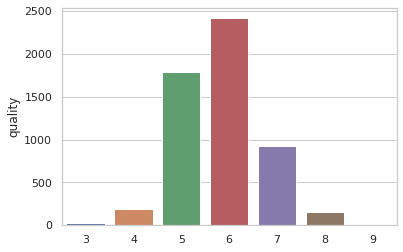

In [5]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

quality = pd.DataFrame(y_train.value_counts())

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=quality.index, y=target, data=quality)
plt.show()

대부분의 와인들이 5~7등급에 위치해있음을 알 수 있습니다.

In [5]:
train.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1338.0,5.637519,0.802575,3.0,5.0,6.0,6.0,8.0
white,4159.0,5.877374,0.883206,3.0,5.0,6.0,6.0,9.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

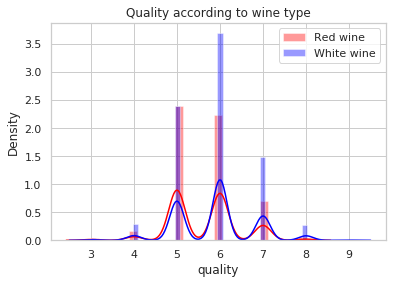

In [50]:
red_wine = train.loc[train['type']=='red','quality']
white_wine = train.loc[train['type']=='white','quality']

# sns.set_style()
sns.distplot(red_wine, color='red', label='Red wine')
sns.distplot(white_wine, color='blue', label='White wine')
plt.title('Quality according to wine type')
plt.legend()

레드와인의 평균 quality는 5.63이고 화이트와인의 평균 quality는 5.88 이다.

In [6]:
train.groupby('type')['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.637519,0.802575
white,5.877374,0.883206


In [52]:
import statsmodels.api as sm

t_stat, p_value, df = sm.stats.ttest_ind(red_wine, white_wine)
't_stat : {:.3f}, p_value: {:.3f}'.format(t_stat, p_value)

't_stat : -8.830, p_value: 0.000'

p_value 값이 0.005보다 작으므로 와인type에 따른 평균 quality 차이가 있다고 할 수 있다.

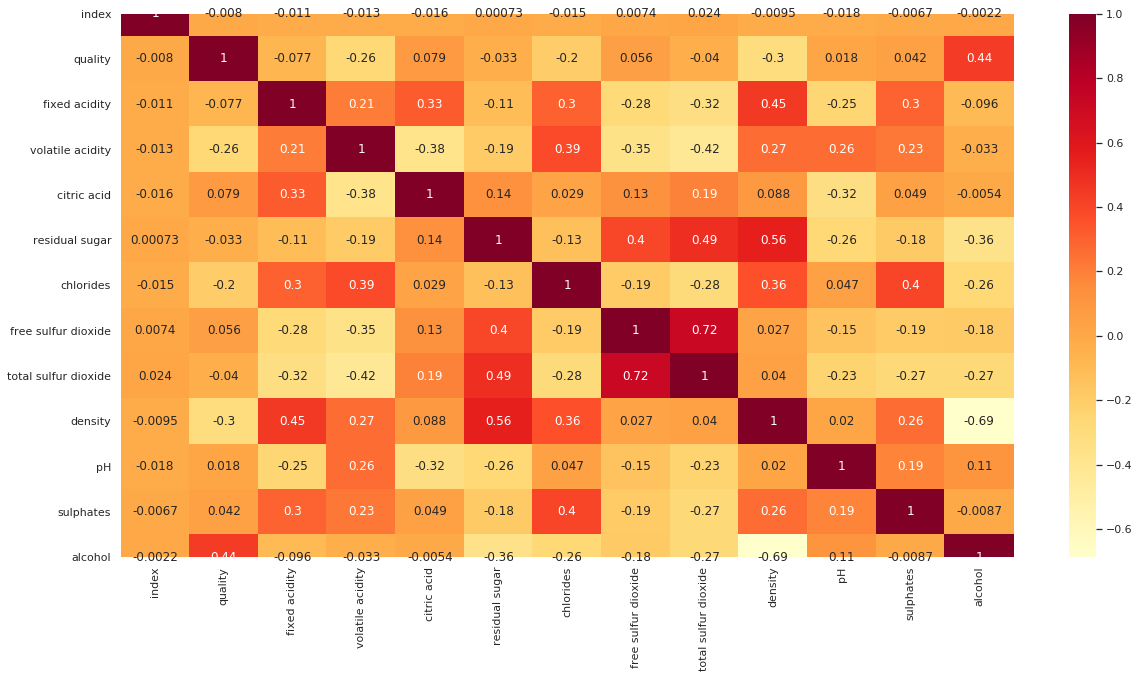

In [7]:
# 타겟과 feature 간의 상관관계
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

# 상관계수 구하기
train_corr = train.corr()

# 상관계수 히트맵 확인
plt.figure(figsize=(20, 10))
sns.heatmap(train_corr, annot=True, cmap='YlOrRd');

In [54]:
# 양의 상관관계를 가지는 feature 확인
train_corr.loc[train_corr['quality'] > 0,'quality']

quality                1.000000
citric acid            0.079157
free sulfur dioxide    0.055574
pH                     0.017931
sulphates              0.042068
alcohol                0.439615
Name: quality, dtype: float64

In [55]:
# 음의 상관관계를 가지는 feature 확인
train_corr.loc[train_corr['quality'] < 0,'quality']

index                  -0.008045
fixed acidity          -0.076506
volatile acidity       -0.261557
residual sugar         -0.032848
chlorides              -0.198148
total sulfur dioxide   -0.039732
density                -0.299831
Name: quality, dtype: float64

데이터의 양이 적은데 반해 feature수는 많아서 feature수를 줄여 과적합을 방지해야 하기때문에 상관관계가 높은 alcohol, density, volatile acidity, chlorides, citric acid  가지고 모델을 만들도록 하겠습니다. 


In [8]:
# 학습데이터와 검증데이터로 분리
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2, random_state=2)
train.shape, val.shape

((4397, 14), (1100, 14))

In [9]:
# 학습과 검증데이터 변수지정
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [58]:
# test = test.columns.drop(['index'])

In [21]:
test

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')

In [10]:
X_train.shape, y_train.shape

((4397, 13), (4397,))

# Feature Engineering

In [6]:
from math import factorial

n = len(train.columns)

def n_choose_k(n, k):
    return factorial(n)/(factorial(k)*factorial(n-k))

combinations = sum(n_choose_k(n,k) for k in range(1,n+1))

combinations

# print(f'{combinations:,.0f}')

16383.0

In [11]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline

encoder = OneHotEncoder(use_cat_names = True)
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)
test = encoder.transform(test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


1 features
Selected names:  Index(['alcohol'], dtype='object')
Test MAE: $1
Test R2: 0.1932974996726542 

2 features
Selected names:  Index(['density', 'alcohol'], dtype='object')
Test MAE: $1
Test R2: 0.19233260298459554 

3 features
Selected names:  Index(['volatile acidity', 'density', 'alcohol'], dtype='object')
Test MAE: $1
Test R2: 0.25309808540442935 

4 features
Selected names:  Index(['volatile acidity', 'chlorides', 'density', 'alcohol'], dtype='object')
Test MAE: $1
Test R2: 0.25310156090059965 

5 features
Selected names:  Index(['volatile acidity', 'chlorides', 'density', 'alcohol', 'type_red'], dtype='object')
Test MAE: $1
Test R2: 0.2559528588552641 

6 features
Selected names:  Index(['volatile acidity', 'chlorides', 'density', 'alcohol', 'type_white',
       'type_red'],
      dtype='object')
Test MAE: $1
Test R2: 0.25595285885526464 

7 features
Selected names:  Index(['fixed acidity', 'volatile acidity', 'chlorides', 'density', 'alcohol',
       'type_white', 'type_r

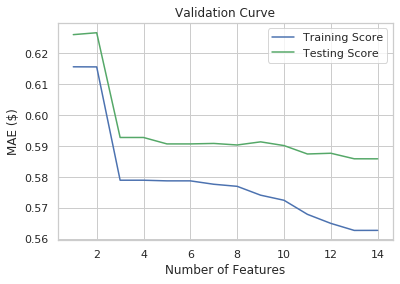

In [14]:
training = []
testing = []
ks = range(1, len(X_train.columns)+1)

for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_val_selected = selector.transform(X_val)
    test_selected = selector.transform(test)

    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

In [12]:
selector = SelectKBest(score_func=f_regression, k=4)
X_train_selected = selector.fit_transform(X_train, y_train)

## 테스트 데이터는 transform
X_val_selected = selector.transform(X_val)
test_selected = selector.transform(test)


X_train_selected.shape, X_val_selected.shape ,test_selected.shape

((4397, 4), (1100, 4), (1000, 4))

In [13]:
X_train = X_train_selected
X_val = X_val_selected
test = test_selected

# 모델링

In [14]:
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from category_encoders import OrdinalEncoder

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


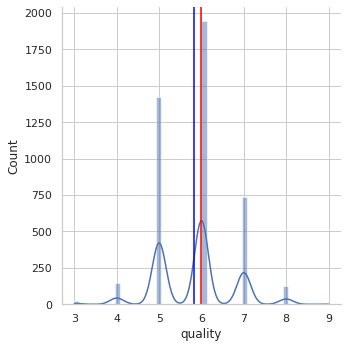

In [15]:
sns.displot(train['quality'], kde=True);

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(train['quality'].mean(), color='blue'); # 평균
plt.axvline(train['quality'].median(), color='red'); # 중간값

In [16]:
predict = train['quality'].mean()
errors = predict - train['quality']
mean_absolute_error = errors.abs().mean()
mean_absolute_error


0.6784160163785194

In [17]:
# 다중선형회귀모델

pipe_lm = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    LinearRegression()
)

pipe_lm.fit(X_train, y_train)
print('검증 정확도: ', pipe_lm.score(X_val, y_val))

검증 정확도:  0.25310156090059965


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [18]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe_rf.fit(X_train, y_train)
print('검증 정확도: ', pipe_rf.score(X_val, y_val))

y_pred = pipe_rf.predict(X_val)
print(classification_report(y_val, y_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.6236363636363637
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.55      0.15      0.23        41
           5       0.66      0.67      0.66       363
           6       0.60      0.70      0.65       471
           7       0.62      0.53      0.57       188
           8       0.73      0.28      0.40        29
           9       0.00      0.00      0.00         2

    accuracy                           0.62      1100
   macro avg       0.45      0.33      0.36      1100
weighted avg       0.62      0.62      0.61      1100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# XGBoost
from xgboost import XGBClassifier

pipe_xg = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier()
)

pipe_xg.fit(X_train, y_train)
print('검증 정확도: ', pipe_xg.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.5581818181818182


검증정확도가 낮으므로 분류문제로 풀어보자

In [20]:
# 타겟을 이진타입으로 변형
train['Quality_calss'] = train['quality'] >= 6.5
train['Quality_calss'].nunique()

2

In [21]:
train['Quality_calss'].value_counts()

False    3535
True      862
Name: Quality_calss, dtype: int64

In [22]:
X_train_selected.shape, X_val_selected.shape ,test_selected.shape

((4397, 4), (1100, 4), (1000, 4))

In [23]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2, random_state=2)
train.shape, val.shape

((3517, 15), (880, 15))

In [24]:
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

target = 'Quality_calss'
features = train.columns.drop([target, 'quality'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
test = test

In [25]:
encoder = OneHotEncoder(use_cat_names = True)
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [26]:
X_train.shape,X_val.shape,test.shape

((3517, 14), (880, 14), (1000, 4))

In [28]:
selector = SelectKBest(score_func=f_regression, k=4)
X_train_selected = selector.fit_transform(X_train, y_train)

## 테스트 데이터는 transform
X_val_selected = selector.transform(X_val)



X_train_selected.shape, X_val_selected.shape 

((3517, 4), (880, 4))

In [29]:
X_train = X_train_selected
X_val = X_val_selected


X_train.shape, X_val.shape ,test.shape

((3517, 4), (880, 4), (1000, 4))

In [30]:
pipe_dtc = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, random_state=2)
)

pipe_dtc.fit(X_train, y_train)
print('검증 정확도: ', pipe_dtc.score(X_val, y_val))

검증 정확도:  0.821590909090909


In [31]:
# XGBoost
pipe_xg = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier()
)

pipe_xg.fit(X_train, y_train)
print('검증 정확도: ', pipe_xg.score(X_val, y_val))
y_pred = pipe_xg.predict(X_val)
print(classification_report(y_val, y_pred))

검증 정확도:  0.8284090909090909
              precision    recall  f1-score   support

       False       0.85      0.96      0.90       718
        True       0.59      0.23      0.33       162

    accuracy                           0.83       880
   macro avg       0.72      0.60      0.62       880
weighted avg       0.80      0.83      0.80       880



/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [33]:
# random_search.get_params().keys()

In [34]:
# XGBoost 교차 검증
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, validation_curve

pipe_xg = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier()
)
parameters = {
        'xgbclassifier__max_depth': [6, 10, 15, 20],
        'xgbclassifier__learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'xgbclassifier__n_estimators': [100]
        }

random_search = RandomizedSearchCV(
    pipe_xg, 
    param_distributions=parameters, 
    n_iter=10, 
    n_jobs=1,
    cv=5,
    scoring='f1_weighted',
    verbose=1,
)

random_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(co

In [35]:
# RandomCV 결과 확인
print('Best Parameters: ', random_search.best_params_)
print('MAE: ', -random_search.best_score_)

Best Parameters:  {'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 15, 'xgbclassifier__learning_rate': 0.2}
MAE:  -0.832128025174188


In [36]:
best_pipe = random_search.best_estimator_


print('검증 정확도: ', best_pipe.score(X_val, y_val))
y_pred = best_pipe.predict(X_val)
print(classification_report(y_val, y_pred))

검증 정확도:  0.8443181818181819
              precision    recall  f1-score   support

       False       0.89      0.92      0.91       718
        True       0.59      0.52      0.55       162

    accuracy                           0.84       880
   macro avg       0.74      0.72      0.73       880
weighted avg       0.84      0.84      0.84       880



In [37]:
y_pred_final = best_pipe.predict(test)

In [38]:
sub[target] = y_pred_final
sub

,index,quality,Quality_calss
0,0,0,False
1,1,0,False
2,2,0,False
3,3,0,False
4,4,0,False
...,...,...,...
995,995,0,False
996,996,0,False
997,997,0,False
998,998,0,False


Text(0.5, 1.0, 'Confusion matrix, n = 880')

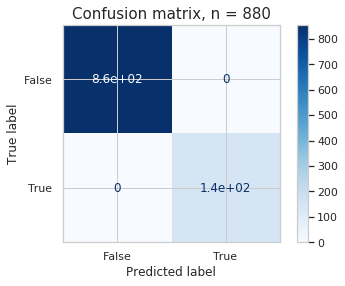

In [39]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(best_pipe, test, y_pred_final,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [50]:
print('검증 정확도', best_pipe.score(test, y_pred_final))

검증 정확도 1.0


# 시각화

In [40]:
import shap
import xgboost

model = xgboost.XGBRegressor().fit(X_train, y_train)

[08:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


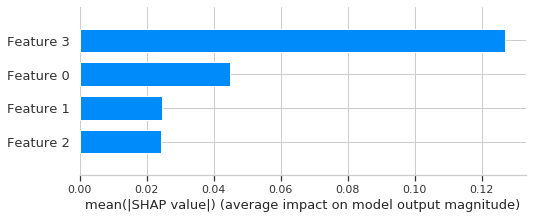

In [52]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

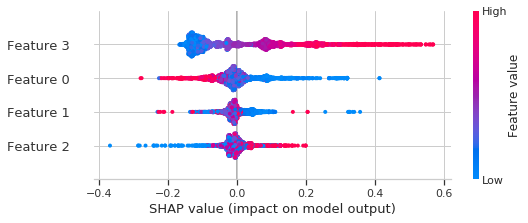

In [50]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

shap.summary_plot(shap_values, X_train)

In [ ]:
'volatile acidity', 'chlorides', 'density', 'alcohol'